In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
def isfloat(num):
    if num == "nan":
        return False
    try:
        float(num)
        return True
    except ValueError:
        return False


def convertToNumber(strVal):
    lowerStrVal = str(strVal).lower()
#     print("original value", lowerStrVal)
    if lowerStrVal.endswith("/week"):
        return int(float(strVal[0:len(strVal)-5]) * 52 + float(strVal[0:len(strVal)-5]) / 7)
    elif lowerStrVal.endswith("k"):
        return int(float(strVal[0:len(strVal)-1]) * 1000)
    elif lowerStrVal.endswith("/h"):
        return int(float(strVal[0:len(strVal)-2])* 8 * 22 * 12)
    elif lowerStrVal.endswith("/month"):
        return int(float(strVal[0:len(strVal)-6]) * 12)
    elif lowerStrVal.endswith("/year"):
        return int(strVal[0:len(strVal)-5])
    elif isfloat(lowerStrVal):
        return int(float(lowerStrVal))
    else:
        return 0

def standardizeString(val):
    strVal = str(val)
    return strVal.title()

def capitalString(val):
    strVal = str(val)
    return strVal.upper()

def convertCadToUsd(cadVal):
    usdVal = int(cadVal * 0.78)
    return usdVal


In [133]:
#print(standardizeString(3.926))
#print(standardizeString("925.3y"))
#print(standardizeString("sdfdfs dsSFs"))
#print(standardizeString("ABC dsfs dfd"))
#print(standardizeString("bcA A"))

In [134]:
# read csv file from github 
csv_data_path = "./salary_infomation.csv"
salary = pd.read_csv(csv_data_path)

salary

,Company,Offer Time,Job,Area,Base,Equity,Bonus,Sign-on,Full Time/Intern,Title/Level,Education,New Grad,Working Experience,Return
0,Oracle,2021 4th quarter,Software Engineer,Great Seattle Area,160k,300k,0,40k,full time,IC & IC3,MS,False,2.5 y,NaN
1,Chewy,2021 4th quarter,Software Engineer,Great Seattle Area,154k,181k,15%,15k,full,IC& SDE II,MS,False,3y,NaN
2,Adobe,2021 4th quarter,Data Science,Bay Area,160k,187500,15%,16k,full,IC &DS II,MS,False,1.3y,NaN
3,Wish,2021 4th quarter,Software Engineer,Great Seattle Area,236K,750k,0,70k,full,IC & L4,MS,False,4y,NaN
4,FaceBook,2021 4th quarter,Machine Learning Engineering,Great Seattle Area,168k,330k,10%,75k,full,IC& E4,PHD,True,0y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Waymo,2021 4th quarter,Machine Learning Eng,Bay Area,170k,275k,25.5k,50k,full,L4,PHD,True,0y,Return Offer
309,google,2021 4th quarter,Software Engineer,Bay Area,155k,140k,15%,0,full,L4,PHD,True,1y,Return Offer
310,Workday,2021 4th quarter,Software Engineer,Canada,73.3k,60k,10%,12.5k,full,associate,BS,True,1y,Return Offer
311,Amazon,2021 4th quarter,Machine Learning Eng,Great Seattle Area,155k,365k,0,36.5k,full,L5,PHD,True,0y,Return Offer


In [164]:
salaryInfo = salary.head(100)

for index, row in salaryInfo.iterrows():
    #print(row)
    salaryInfo.at[index, 'Company'] = standardizeString(row['Company'])
    # row['Campany'] = standardizeString(row['Campany'])
    salaryInfo.at[index, 'Job'] = standardizeString(row['Job'])
    salaryInfo.at[index, 'Area'] = standardizeString(row['Area'])
    salaryInfo.at[index, 'Education'] = capitalString(row['Education'])

    baseVal = convertToNumber(row['Base'])
    equityVal = convertToNumber(row['Equity'])
    signOnVal = convertToNumber(row['Sign-on'])

    if row["Area"] == "Canada":
        baseVal = convertCadToUsd(baseVal)
        equityVal = convertCadToUsd(equityVal)
        signOnVal = convertCadToUsd(signOnVal)

    salaryInfo.at[index, 'Base'] = baseVal
    salaryInfo.at[index, 'Equity'] = equityVal
    salaryInfo.at[index, 'Sign-on'] = signOnVal

#print(salaryInfo.to_string())
salaryInfo

,Company,Offer Time,Job,Area,Base,Equity,Bonus,Sign-on,Full Time/Intern,Title/Level,Education,New Grad,Working Experience,Return
0,Oracle,2021 4th quarter,Software Engineer,Great Seattle Area,160000,300000,0,40000,full time,IC & IC3,MS,False,2.5 y,NaN
1,Chewy,2021 4th quarter,Software Engineer,Great Seattle Area,154000,181000,15%,15000,full,IC& SDE II,MS,False,3y,NaN
2,Adobe,2021 4th quarter,Data Science,Bay Area,160000,187500,15%,16000,full,IC &DS II,MS,False,1.3y,NaN
3,Wish,2021 4th quarter,Software Engineer,Great Seattle Area,236000,750000,0,70000,full,IC & L4,MS,False,4y,NaN
4,Facebook,2021 4th quarter,Machine Learning Engineering,Great Seattle Area,168000,330000,10%,75000,full,IC& E4,PHD,True,0y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Facebook,2021 4th quarter,Machine Learning Engineering,Bay Area,168000,400000,10%,75000,full,IC E4,PHD,True,0y,NaN
96,Citi,2021 4th quarter,Software Engineer,Canada,48672,0,NaN,6084,full,IC TA,BS,True,0y,NaN
97,Bytedance,2021 4th quarter,Machine Learning Engineering,Great Seattle Area,250000,780000,25%,75000,full,IC L3-1,PHD,False,3.5y,NaN
98,Tableau,2021 4th quarter,Data Science,Great Seattle Area,120000,80000,0,17000,full,IC L4,MS,False,3y,NaN


In [165]:
# Bonus function works well on first 150 row and tail 120 row

def f(row):
    bonus = row["Bonus"]

    if isfloat(bonus):
        return 0
    if bonus == "0":
        bonus = 0
    elif bonus.endswith('k'):
        kb = bonus.split("k")
        #print(kb)
        bonus = int(float(kb[0]) * 1000)
    elif bonus.endswith("%"):
        base = int(row["Base"])
        if len(bonus) > 2:
            pb = bonus.split("-")
            #print(pb)
            b = int(pb[0][:2])
        else:
            b = int(bonus[0])
        bonus = base * b // 100
    else:
        bonus = 0
    
    return bonus

salaryInfo["Bonus"] = salaryInfo.apply(f, axis=1)
salaryInfo

<ipython-input-165-2cb3f2d044e4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaryInfo["Bonus"] = salaryInfo.apply(f, axis=1)


,Company,Offer Time,Job,Area,Base,Equity,Bonus,Sign-on,Full Time/Intern,Title/Level,Education,New Grad,Working Experience,Return
0,Oracle,2021 4th quarter,Software Engineer,Great Seattle Area,160000,300000,0,40000,full time,IC & IC3,MS,False,2.5 y,NaN
1,Chewy,2021 4th quarter,Software Engineer,Great Seattle Area,154000,181000,23100,15000,full,IC& SDE II,MS,False,3y,NaN
2,Adobe,2021 4th quarter,Data Science,Bay Area,160000,187500,24000,16000,full,IC &DS II,MS,False,1.3y,NaN
3,Wish,2021 4th quarter,Software Engineer,Great Seattle Area,236000,750000,0,70000,full,IC & L4,MS,False,4y,NaN
4,Facebook,2021 4th quarter,Machine Learning Engineering,Great Seattle Area,168000,330000,16800,75000,full,IC& E4,PHD,True,0y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Facebook,2021 4th quarter,Machine Learning Engineering,Bay Area,168000,400000,16800,75000,full,IC E4,PHD,True,0y,NaN
96,Citi,2021 4th quarter,Software Engineer,Canada,48672,0,0,6084,full,IC TA,BS,True,0y,NaN
97,Bytedance,2021 4th quarter,Machine Learning Engineering,Great Seattle Area,250000,780000,62500,75000,full,IC L3-1,PHD,False,3.5y,NaN
98,Tableau,2021 4th quarter,Data Science,Great Seattle Area,120000,80000,0,17000,full,IC L4,MS,False,3y,NaN


In [99]:
salary.shape

(313, 14)

In [101]:
salary.columns

Index(['Company', 'Offer Time', 'Job', 'Area', 'Base', 'Equity', 'Bonus',
       'Sign-on', 'Full Time/Intern', 'Title/Level', 'Education', 'New Grad',
       'Working Experience', 'Return'],
      dtype='object')

In [87]:
# How many companies total
print(salary['Company'].nunique())
salary['Company'].unique()

114


array(['Oracle', 'Chewy', 'Adobe', 'Wish', 'Facebook', 'Google', 'Indeed',
       'Amazon', 'Snapchat', 'Goldman Sachs', 'Uber', 'Bytedance',
       'Intuit', 'Twitter', 'Doordash', 'Flatiron Health', 'Quora',
       'Apple', 'Root Insurance', 'Bloomberg', 'Coinbase', 'Microsoft',
       'Godaddy', 'Flexport', 'Rivian', 'Rippling', 'Airbnb', 'Okta',
       'Square', 'Hpe', 'Linkedin', 'Salesforce', 'Wayfair',
       'F5 Networks', 'Jp Morgan', "Lowe'S", 'Chime', 'Coursera', 'Carta',
       'Ebay', 'Nuro', 'Walmart Labs', 'Draftkings', 'Citi', 'Tableau',
       'Toast', 'Ibm', 'Intel', 'Weride', 'Mongodb', 'Dropbox', 'Tencent',
       'Pinterest', 'Sony', 'Confluent', 'Nefixs',
       'Millennium Management', 'Qualcomm', 'Aurora', 'T-Mobile',
       'Two Sigma', 'Sumo Logic', 'Visa', 'Waymo', 'Zoox', 'AMD', 'Yelp',
       'pure storage', 'capital1', 'SnapChat', 'Paypal', 'Coupang',
       'Discord', 'Imc', 'Tusimple', 'Blizzard Entertainment', 'Expedia',
       'Affirm', 'Databricks', '

In [97]:
# mean of Base, Bonus, Equity, Sign-on
#print(salary['Base'].mean())
#print(salary['Bonus'].mean())
#print(salary['Equity'].mean())
#print(salary['Sign-On'].mean())

In [102]:
# How many Jobs in total

salary['Job'].unique()

#Machine Learning Engineering and Machine Learning Eng are same. 

array(['Software Engineer', 'Data Science',
       'Machine Learning Engineering', 'Front End Engineer',
       'Hardware Engineer', 'Engineering Manager', 'Machine Learning Eng'],
      dtype=object)

In [123]:
# How many Education types 
salary['Education'].unique()

array(['MS', 'PHD', 'BS'], dtype=object)

In [167]:
# a currently only first 100 row of the data.
# catagories of different education background
a = salaryInfo

ms = a[a['Education']=="MS"]
phd = a[a['Education'] == 'PHD']
bs = a[a['Education'] == 'BS']


,Company,Offer Time,Job,Area,Base,Equity,Bonus,Sign-on,Full Time/Intern,Title/Level,Education,New Grad,Working Experience,Return
0,Oracle,2021 4th quarter,Software Engineer,Great Seattle Area,160000,300000,0,40000,full time,IC & IC3,MS,False,2.5 y,NaN
1,Chewy,2021 4th quarter,Software Engineer,Great Seattle Area,154000,181000,23100,15000,full,IC& SDE II,MS,False,3y,NaN
2,Adobe,2021 4th quarter,Data Science,Bay Area,160000,187500,24000,16000,full,IC &DS II,MS,False,1.3y,NaN
3,Wish,2021 4th quarter,Software Engineer,Great Seattle Area,236000,750000,0,70000,full,IC & L4,MS,False,4y,NaN
5,Oracle,2021 4th quarter,Software Engineer,Bay Area,163500,420000,0,48000,full,IC & IC3,MS,False,2y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Nuro,2021 4th quarter,Software Engineer,Bay Area,450000,0,0,0,full,LC SE,MS,False,5y,NaN
90,Microsoft,2021 4th quarter,Software Engineer,Great Seattle Area,90000,0,0,0,intern,Intern,MS,True,0y,NaN
92,Draftkings,2021 4th quarter,Software Engineer,Great Boston Area,67200,0,0,0,intern,Intern,MS,True,0y,NaN
98,Tableau,2021 4th quarter,Data Science,Great Seattle Area,120000,80000,0,17000,full,IC L4,MS,False,3y,NaN


In [168]:
# calculate total package. 
def getPackage(row):
    package = 0
    base = row['Base']
    bonus = row['Bonus']
    equity = row['Equity']
    sign = row['Sign-on']
    package += base + bonus + equity + sign
    return package

ms["Total"] = ms.apply(getPackage, axis=1)
bs["Total"] = bs.apply(getPackage, axis=1)
phd["Total"] = phd.apply(getPackage, axis=1)

<ipython-input-168-e9864515cdd3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms["Total"] = ms.apply(getPackage, axis=1)
<ipython-input-168-e9864515cdd3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bs["Total"] = bs.apply(getPackage, axis=1)
<ipython-input-168-e9864515cdd3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [169]:
# calculate means of each education catagory
ms_tmean = ms['Total'].mean()
phd_tmean = phd['Total'].mean()
bs_tmean = bs['Total'].mean()

ms_base_mean = ms['Base'].mean()
bs_base_mean = bs['Base'].mean()
phd_base_mean = phd['Base'].mean()

16170.15873015873

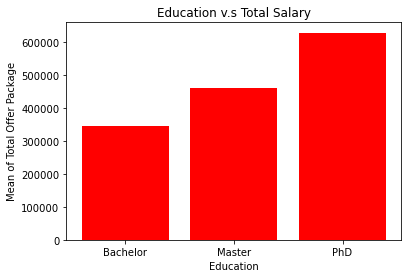

In [182]:
# Getting bar chart of means of different education backgrounds 

means = [bs_tmean, ms_tmean, phd_tmean]
educations = ['Bachelor', 'Master', 'PhD']
fig = plt.figure()
plt.bar(educations, means, color = 'r')
plt.title('Education v.s Total Salary')
plt.xlabel('Education')
plt.ylabel('Mean of Total Offer Package')
fig.savefig('EducationSalary1.png')

<Figure size 432x288 with 0 Axes>

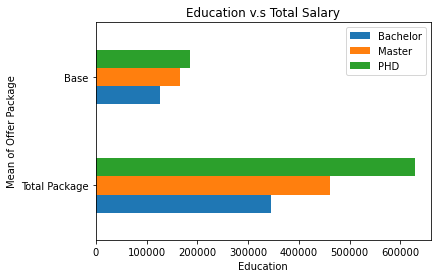

In [185]:
df = pd.DataFrame()
df['Bachelor'] =[bs_tmean, bs_base_mean]
df['Master'] = [ms_tmean, ms_base_mean]
df['PHD'] = [phd_tmean, phd_base_mean]

ind = np.arange(2)
df.plot(kind = 'barh')
plt.title('Education v.s Total Salary')
plt.xlabel('Education')
plt.ylabel('Mean of Offer Package')
plt.yticks(ind, ('Total Package', 'Base'))
plt.savefig('EducationSalary2.png')